# Exploratory Data Analysis (EDA)

During this phase, we examine and understand the structure, content, and characteristics of a dataset. Our goal is to identify patterns, anomalies, relationships, and other key aspects that may influence subsequent analyses or decision-making.

## Objectives of EDA

### 1. Understanding the Dataset
- Load and visualize the dataset to familiarize ourselves with its general characteristics.
- Review the rows to understand its structure.

### 2. Missing Data
- Identify and quantify missing data in the dataset.

### 3. Data Types
- Review the data types of each column.
- Identify potential inconsistencies in data types.

### 4. Data Distribution
- Analyze the distribution of data in each column.
- Use visualizations to understand the shape and spread of the data.

### 5. Correlations and Patterns
- Calculate and visualize correlations between numerical variables.
- Identify potential patterns or relationships between variables.

### 6. Visualizations
- Create charts and diagrams to visualize different aspects of the dataset.

### 7. Evaluating Data Quality
- Assess the overall quality of the dataset, identifying possible errors in the data.
- Propose solutions to improve the dataset's quality if necessary.
- This will be done as the EDA progresses.

## Environment Setup
Ensure your environment variables contain your database credentials (from the `.env` file) and that the necessary packages are installed using:

```bash
pip install -r requirements.txt

---

First, we will load the environment variables from the .env file, which contains important configurations such as paths and credentials. Then, we will obtain the working directory from these variables and add it to the system path to ensure that the project's modules can be imported correctly.

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /home/carol/workshop-02


Now, we import the necessary modules and classes for the rest of the notebook.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


We read the Grammy dataset with pandas:

In [5]:
df = pd.read_csv('../data/spotify_dataset.csv',sep=',', encoding='utf-8')

The Spotify dataset has **114,000 rows** and **21 columns.**

In [4]:
df.shape

(114000, 21)

The columns provided initially are:

## **Dataset Columns:**

1. **Unnamed: 0**: 
   - Row index or identifier. 📊

2. **track_id**: 
   - Spotify ID for the track. 🎵

3. **artists**: 
   - Names of the artists performing the track. If there are multiple artists, they are separated by `;`. 🎤

4. **album_name**: 
   - Name of the album featuring the track. 📀

5. **track_name**: 
   - Name of the track. 🎶

6. **popularity**: 
   - Popularity of the track (from 0 to 100), calculated based on total streams and recency. 🌟

7. **duration_ms**: 
   - Duration of the track in milliseconds. ⏱️

8. **explicit**: 
   - Indicates whether the track contains explicit lyrics (`true` or `false`). 🚫

9. **danceability**: 
   - Measure of how suitable the track is for dancing (from 0.0 to 1.0), based on musical elements like tempo, rhythm stability, and beat strength. 💃

10. **energy**: 
    - Measure of intensity and activity of the track (from 0.0 to 1.0). More energetic tracks feel fast, strong, and loud. ⚡

11. **key**: 
    - Key of the track using the Pitch Class notation (0 = C, 1 = C♯/D♭, 2 = D, etc.). If no key is detected, the value is -1. 🎼

12. **loudness**: 
    - Overall loudness of the track in decibels (dB). 🔊

13. **mode**: 
    - Mode of the track (1 for major, 0 for minor). 🎶

14. **speechiness**: 
    - Measure of the presence of spoken words in the track (from 0.0 to 1.0). High values indicate spoken word recordings, while low values represent music and other non-verbal content. 🗣️

15. **acousticness**: 
    - Measure of the certainty that the track is acoustic (from 0.0 to 1.0). Values close to 1.0 indicate a high probability that the track is acoustic. 🎸

16. **instrumentalness**: 
    - Prediction of whether the track contains vocals (from 0.0 to 1.0). Values close to 1.0 suggest that the track has no vocal content. 🎼

17. **liveness**: 
    - Measure of the presence of an audience in the recording (from 0.0 to 1.0). High values indicate a high probability that the track was performed live. 🎤

18. **valence**: 
    - Measure of the musical positiveness conveyed by the track (from 0.0 to 1.0). Tracks with high valence sound more positive, while those with low valence sound more negative. 😊

19. **tempo**: 
    - Estimated tempo of the track in beats per minute (BPM). 🥁

20. **time_signature**: 
    - Estimated time signature (from 3 to 7), indicating the number of beats in each measure. ⏳

21. **track_genre**: 
    - Genre of the track.

In [20]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

This is an initial look at our dataset:

In [17]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


There are no duplicates:

In [18]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data Missing

There are null values; there is 1 in both artists, album_name, and track_name.

In [22]:
missing_data = df.isna().sum()
missing_data

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

If we observe, these null values are in a single record. These three columns are important for identifying the song, but since we don't know, we can drop it.

In [19]:
nan_records = df[df.isna().any(axis=1)]
nan_records

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [20]:
nan_record_index = df[df.isna().any(axis=1)].index
df.drop(nan_record_index, inplace=True)

## Data Type:

### Quantitative Data
Numerical values that can be measured and analyzed statistically.
- **Unnamed: 0**: int64
- **popularity**: int64
- **duration_ms**: int64
- **danceability**: float64
- **energy**: float64
- **key**: int64
- **loudness**: float64
- **mode**: int64
- **speechiness**: float64
- **acousticness**: float64
- **instrumentalness**: float64
- **liveness**: float64
- **valence**: float64
- **tempo**: float64
- **time_signature**: int64

### Qualitative Data
Descriptive data that represents categories or characteristics.
- **track_id**: object
- **artists**: object
- **album_name**: object
- **track_name**: object
- **explicit**: bool
- **track_genre**: object

In [14]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Let's ensure that the text strings are in the same format.

In [21]:
df.loc[:, 'artists'] = df['artists'].str.title().str.strip()
df.loc[:, 'album_name'] = df['album_name'].str.title().str.strip()
df.loc[:, 'track_name'] = df['track_name'].str.title().str.strip()
df.loc[:, 'track_genre'] = df['track_genre'].str.title().str.strip()

## Data Distribution

I've decided to remove the ID for now for some of the charts/tables; we'll regenerate it later.

In [22]:
df = df.drop(columns=['Unnamed: 0'])

We will use describe() for a statistical summary:

In [27]:
statisticians = df.describe().T
statisticians['median'] = df.select_dtypes("number").median()
statisticians = statisticians.iloc[:,[0,1,8,2,3,4,5,6,7]]
np.round(statisticians,2)

,count,mean,median,std,min,25%,50%,75%,max
popularity,114000.0,33.24,35.00,22.31,0.00,17.00,35.00,50.00,100.00
duration_ms,114000.0,228029.15,212906.00,107297.71,0.00,174066.00,212906.00,261506.00,5237295.00
danceability,114000.0,0.57,0.58,0.17,0.00,0.46,0.58,0.70,0.98
energy,114000.0,0.64,0.68,0.25,0.00,0.47,0.68,0.85,1.00
key,114000.0,5.31,5.00,3.56,0.00,2.00,5.00,8.00,11.00
loudness,114000.0,-8.26,-7.00,5.03,-49.53,-10.01,-7.00,-5.00,4.53
mode,114000.0,0.64,1.00,0.48,0.00,0.00,1.00,1.00,1.00
speechiness,114000.0,0.08,0.05,0.11,0.00,0.04,0.05,0.08,0.96
acousticness,114000.0,0.31,0.17,0.33,0.00,0.02,0.17,0.60,1.00
instrumentalness,114000.0,0.16,0.00,0.31,0.00,0.00,0.00,0.05,1.00


We can observe this better through graphs:

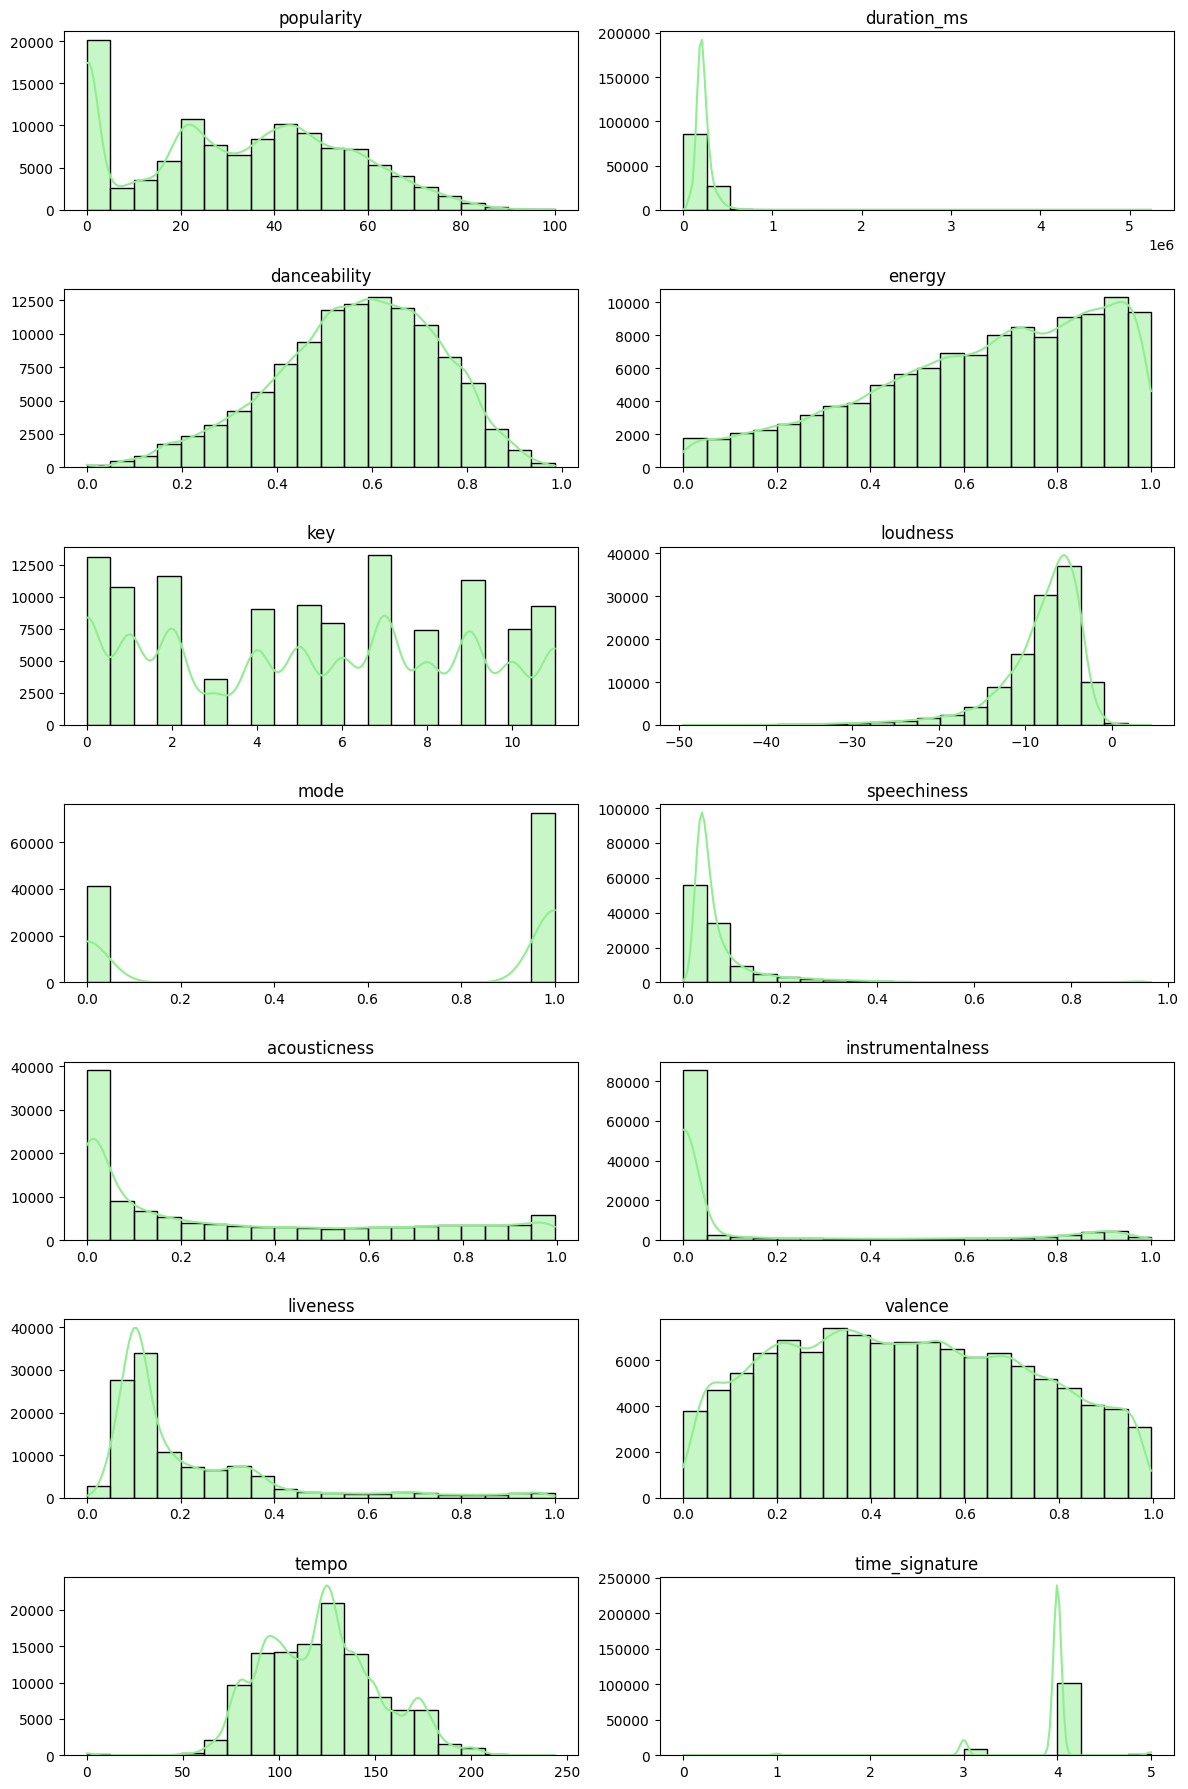

In [26]:
quantitative = df.select_dtypes(include=['int64', 'float64'])
n_cols = len(quantitative.columns)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 18))

axes = axes.flatten()

for i, (ax, column) in enumerate(zip(axes, quantitative.columns)):
    sns.histplot(quantitative[column], kde=True, bins=20, ax=ax, color='lightgreen')
    ax.set_title(f'{column}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

**Key Variable Analysis:**

**Popularity**
- Most songs have low to moderate popularity (peaks at lower values), with some reaching high values but they are less common. 
- Many songs in the dataset are not extremely popular, suggesting a variety of lesser-known tracks. 🌟

**Duration (Milliseconds)**
- There is a strong concentration of songs with short durations (under 500,000 ms = 8.3 minutes), with very few songs of longer duration. 
- Most songs have typical durations ranging from 2 to 5 minutes, which is standard in the music industry. ⏱️

**Danceability**
- It follows a symmetrical distribution around 0.6, with most songs achieving average danceability values. 
- Most songs are moderately danceable, which is typical in many popular music tracks. 💃

**Energy**
- Energy increases towards higher values, concentrating in the range of 0.6 to 1.0. 
- The songs in the dataset tend to be energetic, indicating many have a fast and strong rhythm. ⚡

**Key**
- Key values are fairly evenly distributed across different tonalities. 
- The songs are spread across various keys, suggesting musical diversity in terms of tones. 🎼

**Loudness (Decibels)**
- Most songs have loudness values ranging from -20 to -5 dB, which is typical of modern recordings. 
- The songs are neither extremely quiet nor loud but have a relatively high volume level, common in commercial music. 🔊

**Mode**
- Major modes (value 1) predominate, with fewer songs in minor mode (value 0). 
- Most songs are in major mode, which is often associated with brighter or more cheerful melodies. 🎉

**Speechiness**
- Most songs have low values, indicating they contain little to no spoken words. 
- Many songs are more musical than spoken, which is common outside genres like rap or spoken word. 🗣️

**Acousticness**
- Most songs have low acousticness values, with some showing a high level of acoustic quality. 
- The majority of the dataset consists of electronically produced or amplified music, but there is a significant portion of acoustic songs. 🎸

**Instrumentalness**
- Most songs have low values, indicating they are vocal tracks. 
- The majority of songs in the dataset contain vocals, with a few being purely instrumental. 🎶

**Liveness**
- Most songs have low audience presence values. 
- The majority of songs appear to have been studio-recorded rather than performed live. 🎤

**Valence**
- Valence values are evenly distributed in the range of 0.0 to 1.0. 
- Songs vary widely in their emotional tone, from more melancholic to cheerful. 😊

**Tempo (BPM)**
- There is a normal distribution centered around 120-130 BPM, which is typical in dance or pop music. 
- Most songs have moderate tempos, which is common across many popular genres. 🥁

**Time Signature**
- Almost all songs have a 4/4 time signature, with very few variations. 
- The 4/4 time signature is the most common in popular music, consistent across the majority of songs in this dataset. ⏳


### Outliers

Now we will look at the outliers:

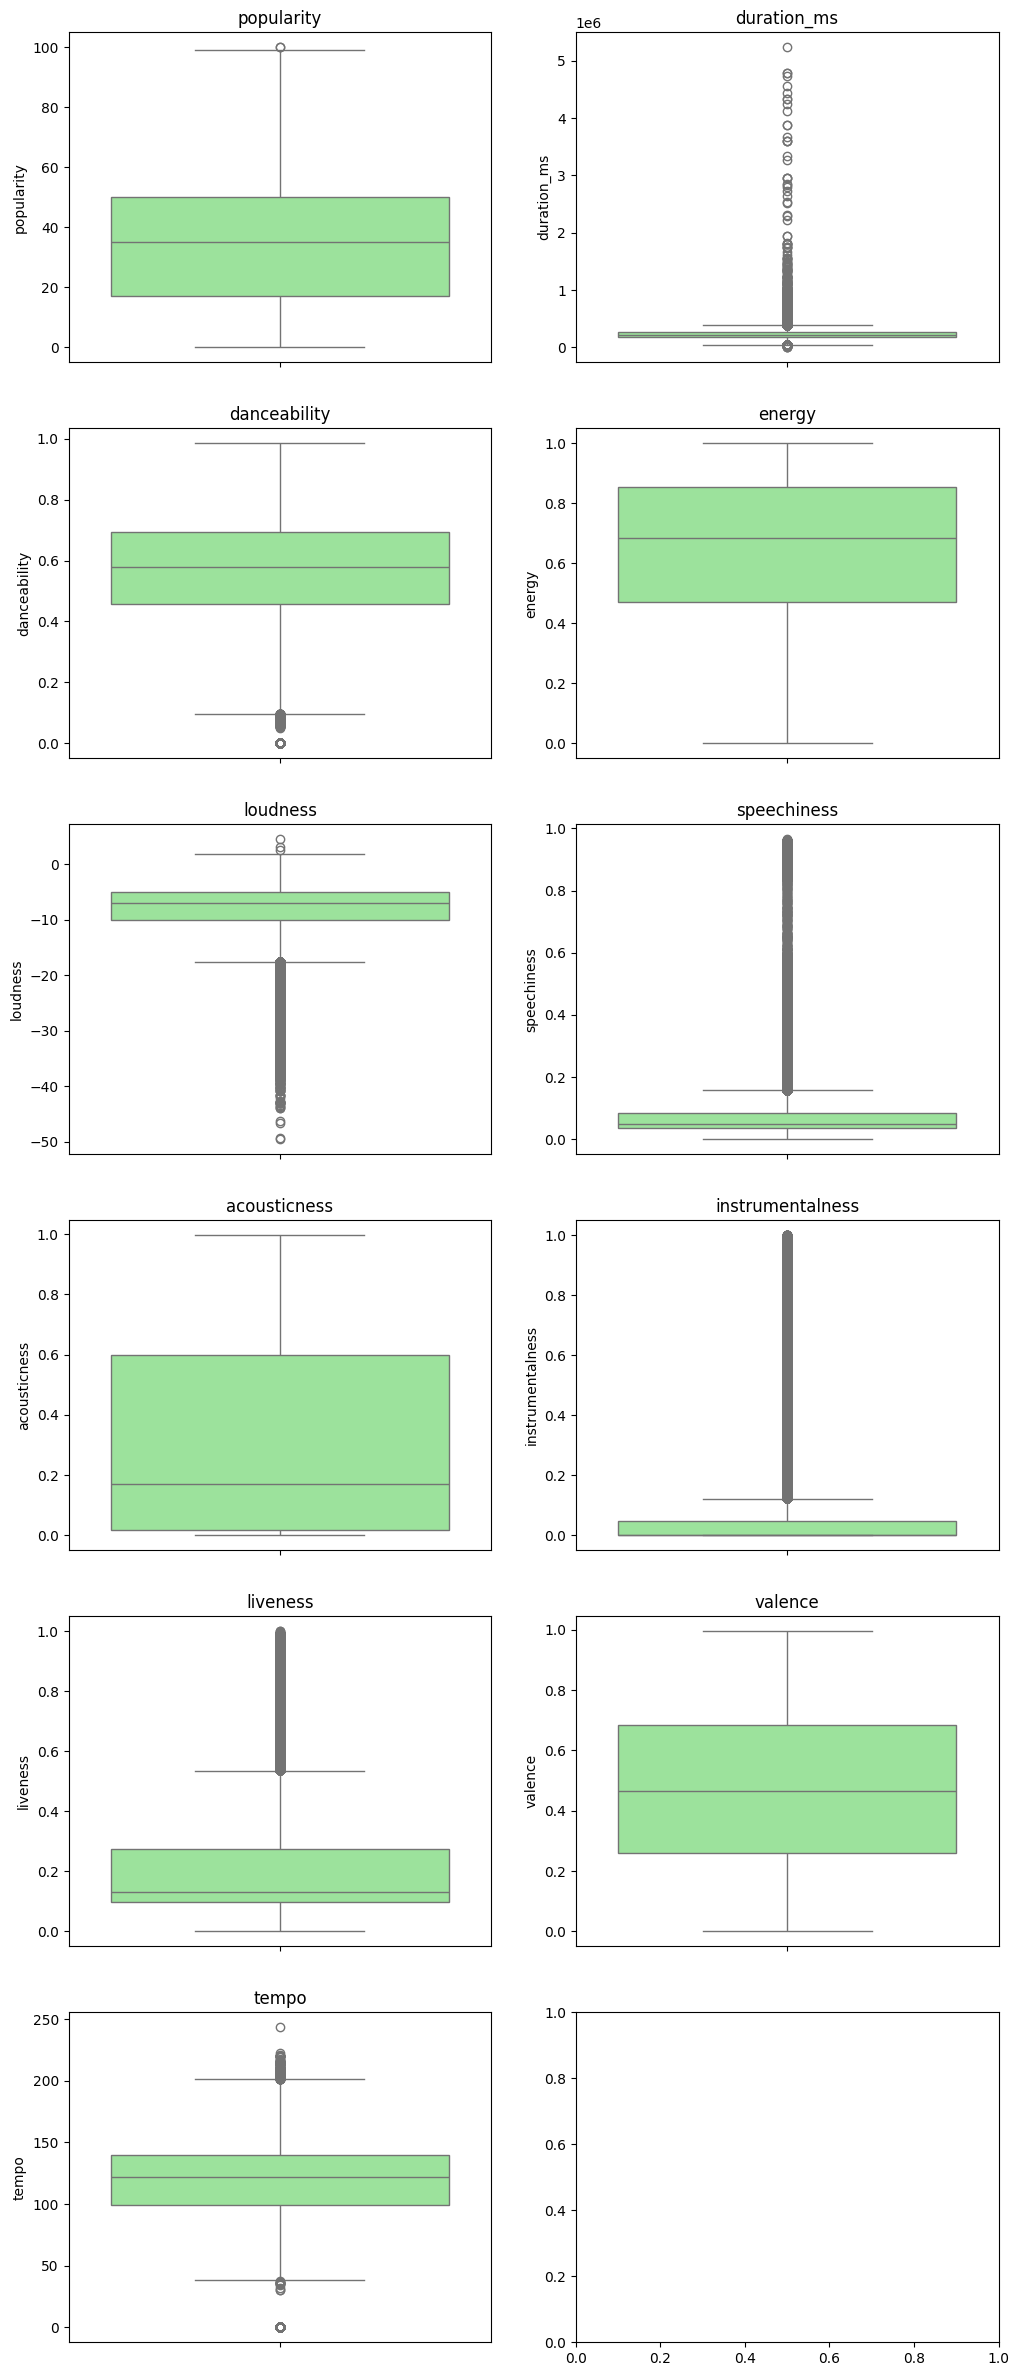

In [29]:
quantitative = df.select_dtypes(include=['int64', 'float64'])

columns_to_plot = quantitative.drop(columns=['time_signature', 'key', 'mode'], errors='ignore')

fig, axes = plt.subplots(nrows= 6, ncols=2, figsize=(12, 30))

for ax, column in zip(axes.flatten(), columns_to_plot.columns):
    sns.boxplot(y=df[column], ax=ax, color='lightgreen')
    ax.set_title(column)

plt.show()

🎶 **Outlier Analysis**

**Popularity**
- Some values exceed 100, which is rare and may indicate data errors.
- Most songs have moderate popularity, but a few are extremely popular (potential hits).

**Duration (Milliseconds)**
- Many extremely long durations exceed 5 million milliseconds (around 1.4 hours).
- These could represent podcasts or unusually long compositions, exceptional compared to the average. 

**Danceability**
- Some values below 0.2 indicate low danceability.
- While most songs are danceable, some are outliers, suggesting less rhythm or inconsistent tempo. 

**Energy**
- Few visible outliers.
- Songs generally exhibit moderate to high energy, with few exceptions. 

**Loudness (Decibels)**
- Several values in the range of -40 to -50 dB, which is very quiet for music.
- These may result from defective recordings or tracks with special quiet sound effects. 

**Speechiness**
- Several values above 0.6, indicating significant spoken content.
- Most songs are musical, but exceptions may include rap or podcasts. 

**Acousticness**
- Few notable outliers.
- Most songs have moderate acoustic levels, with few exceptions. 

**Instrumentalness**
- Many values close to 1.0 indicate nearly entirely instrumental tracks.
- While most songs have vocals, a few purely instrumental tracks exist. 

**Liveness**
- Several high values (near 1.0) indicate strong audience presence.
- While most songs are studio recordings, some live tracks are included. 

**Valence**
- Few significant outliers observed.
- Songs vary widely in emotional positivity, but few significantly deviate. 

**Tempo (BPM)**
- Some extremely fast (> 200 BPM) and slow (< 50 BPM) values.
- These outliers represent unusually fast or slow songs compared to most popular music. 


The continuous variables in the dataset do **not have a valid reason for removal**, as they represent the diversity of music. The dataset includes songs from different genres and styles, resulting in significant variability in song characteristics. These values reflect the natural extremes of music distribution, and they can represent valid music even if they are not common.

## Data Correlation

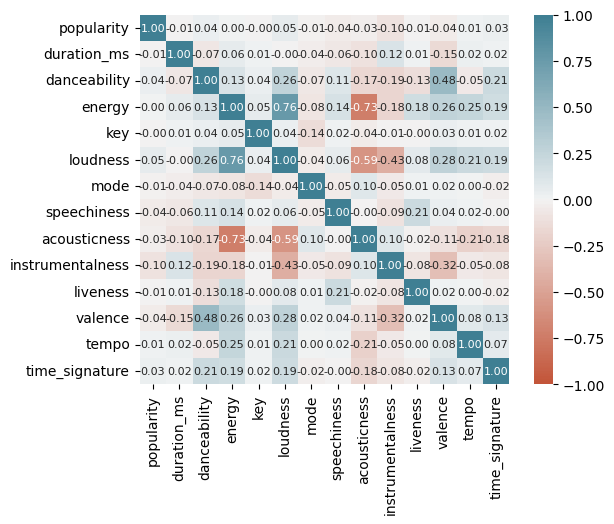

In [30]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

Since there are many variables, let's provide a general conclusion.

- **Energy** and **loudness** are strongly related, suggesting that energetic songs tend to be louder.
- **Acousticness** has a strong negative relationship with **energy** and **loudness**, indicating that acoustic songs tend to be quieter.
- **Instrumentalness** and **loudness** have a moderate negative correlation. This indicates that songs with a higher tendency to be instrumental (with few or no vocals) tend to be quieter.
- **Valence** and **danceability** have a positive correlation, suggesting that more positive songs tend to be more danceable.


## Data Patterns

In this case, we will examine the 10 most frequent data points:

/tmp/ipykernel_4727/4101670882.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(top_albums.index, ha='right')
/tmp/ipykernel_4727/4101670882.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(top_tracks.index, ha='right')


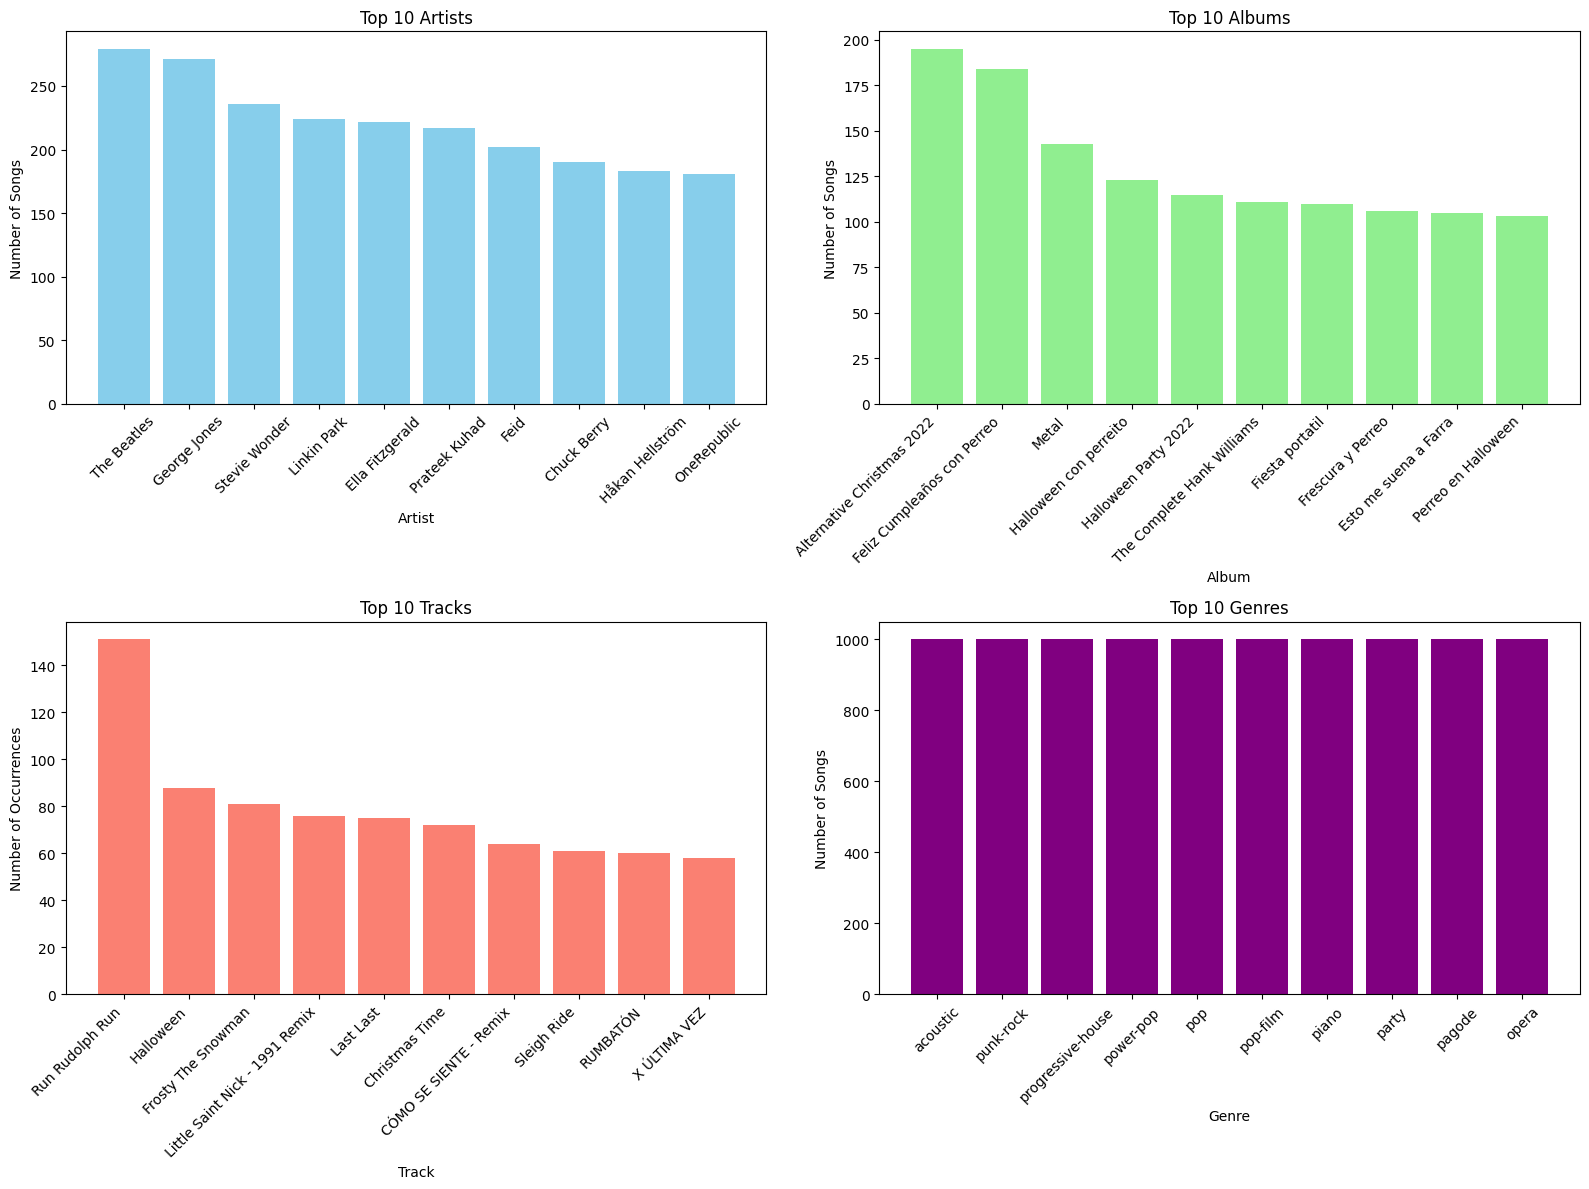

In [8]:
top_artists = df['artists'].value_counts().head(10)
top_albums = df['album_name'].value_counts().head(10)
top_tracks = df['track_name'].value_counts().head(10)
top_genres = df['track_genre'].value_counts().head(10)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].bar(top_artists.index, top_artists.values, color='skyblue')
axs[0, 0].set_title('Top 10 Artists')
axs[0, 0].set_xlabel('Artist')
axs[0, 0].set_ylabel('Number of Songs')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(top_albums.index, top_albums.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Albums')
axs[0, 1].set_xlabel('Album')
axs[0, 1].set_ylabel('Number of Songs')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_xticklabels(top_albums.index, ha='right')

axs[1, 0].bar(top_tracks.index, top_tracks.values, color='salmon')
axs[1, 0].set_title('Top 10 Tracks')
axs[1, 0].set_xlabel('Track')
axs[1, 0].set_ylabel('Number of Occurrences')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_xticklabels(top_tracks.index, ha='right')

axs[1, 1].bar(top_genres.index, top_genres.values, color='purple')
axs[1, 1].set_title('Top 10 Genres')
axs[1, 1].set_xlabel('Genre')
axs[1, 1].set_ylabel('Number of Songs')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

🎶 **Most Frequent Data Points**

In the top 1 most frequent data, we have:

- **Artist**: The Beatles
- **Album**: Alternative Christmas 2022
- **Track**: Run Rudolph Run
- **Genre**: Acoustic

The previous chart revealed something interesting, indicating that we need to perform a transformation. In our top 10 tracks, we see that some songs even repeat quite frequently, which warrants a closer look.

We know that songs can have the same title but be from different artists, but that is not the case here.


In [19]:
df[df['track_name'] == 'Run Rudolph Run']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8163,8163,1S4rxDloMtAduogKeiJZmR,Chuck Berry,CHRISTMAS TOP HITS 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8164,8164,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8165,8165,52MCmoSCtPRbVN5Njdo6G5,Chuck Berry,Weihnachten Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8166,8166,7m4luTtlene5vS6xUvWxRt,Chuck Berry,Holidays Are Coming,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8168,8168,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,1,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92043,92043,3iyTXUFlm1YrquUUgXlPM1,Chuck Berry,All I want For Christmas Is Music,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92044,92044,0XgmLT6nDInA6w2yxpVsZh,Chuck Berry,Rockin' Around The Christmas Tree 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92046,92046,4vJrtcgQoULwkPyFkXNYCx,Chuck Berry,pov: you bake cookies,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92049,92049,3IUpuyEMIgt4GvEZ2TqERF,Chuck Berry,Jingle Bell Rock 2022,Run Rudolph Run,0,162897,False,0.647,0.876,...,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly


This dataset gives us the same song in different Spotify playlists/albums, but I have decided to keep **only the album with the highest popularity**. For the analysis I will conduct, it is unnecessary to retain all those records. In some cases, the original album of the song tends to be the most popular (if that album is available on Spotify), and the song data in the most popular album usually aligns more closely with that of the original song.

In [23]:
df_max_popularity = df.loc[df.groupby(['track_name', 'artists'])['popularity'].idxmax()].reset_index(drop=True)

track_ids_to_keep = df_max_popularity[['track_name', 'artists', 'track_id']].drop_duplicates()

df = df.merge(track_ids_to_keep, on=['track_name', 'artists', 'track_id'])

In [24]:
df[df['track_name'] == 'Run Rudolph Run']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80424,2pnPe4pJtq7689i5ydzvJJ,Chuck Berry,Rock 'N' Roll Rarities,Run Rudolph Run,59,165733,False,0.681,0.715,7,-10.609,0,0.0912,0.812,0.000009,0.0777,0.957,152.132,4,Rockabilly


For example, "Bad Guy" by Billie Eilish had a similar situation to "Run Rudolph Run," appearing in multiple albums. Now, the original album of the song, titled "When We All Fall Asleep, Where Do We Go?" is released.

In [25]:
df[(df['track_name'] == 'Bad Guy') & (df['artists'] == 'Billie Eilish')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
27278,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"When We All Fall Asleep, Where Do We Go?",Bad Guy,84,194087,False,0.701,0.425,7,-10.965,1,0.375,0.328,0.13,0.1,0.562,135.128,4,Electro


## Data Visualization

A chart has been created for the top 10 most popular songs:

C:\Users\carol\AppData\Local\Temp\ipykernel_7180\2942705516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_popular, x='popularity', y='track_name', palette='viridis')


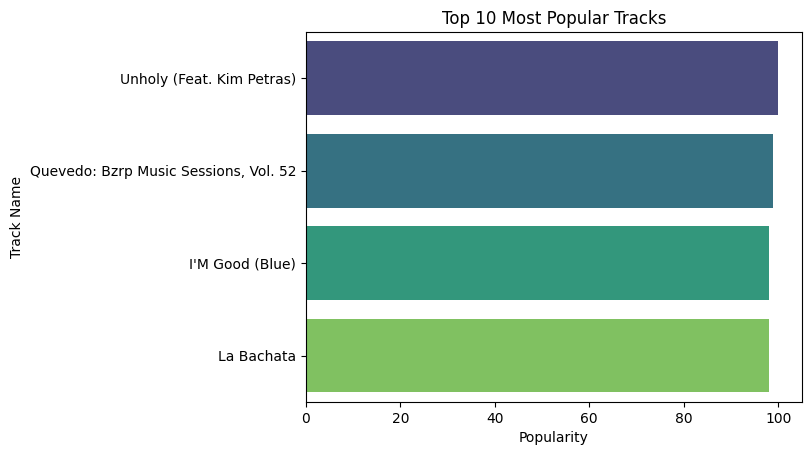

In [26]:
top_10_popular = df.nlargest(10, 'popularity')
sns.barplot(data=top_10_popular, x='popularity', y='track_name', palette='viridis')
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()

- The 10 most popular songs have a popularity rating of over approximately 98. "Unholy" ranks as the top song with a popularity score of 100.

Now, let's take a look at the genres with the highest popularity:

C:\Users\carol\AppData\Local\Temp\ipykernel_7180\1458312999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


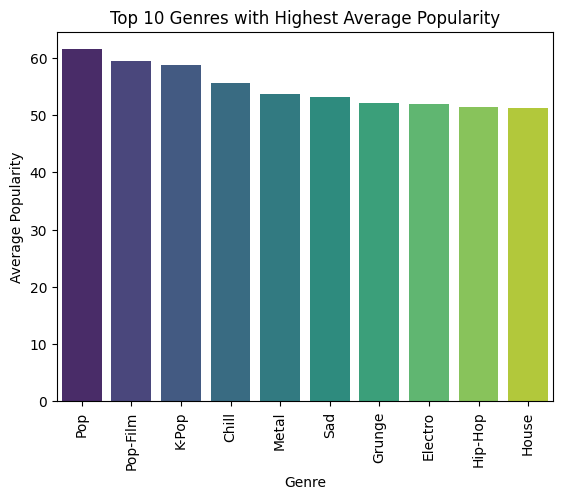

In [28]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().nlargest(10)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

- The top 10 most popular genres have a popularity score above 50. The top genre is pop, with a popularity score of 60.

/tmp/ipykernel_4727/3103392126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')


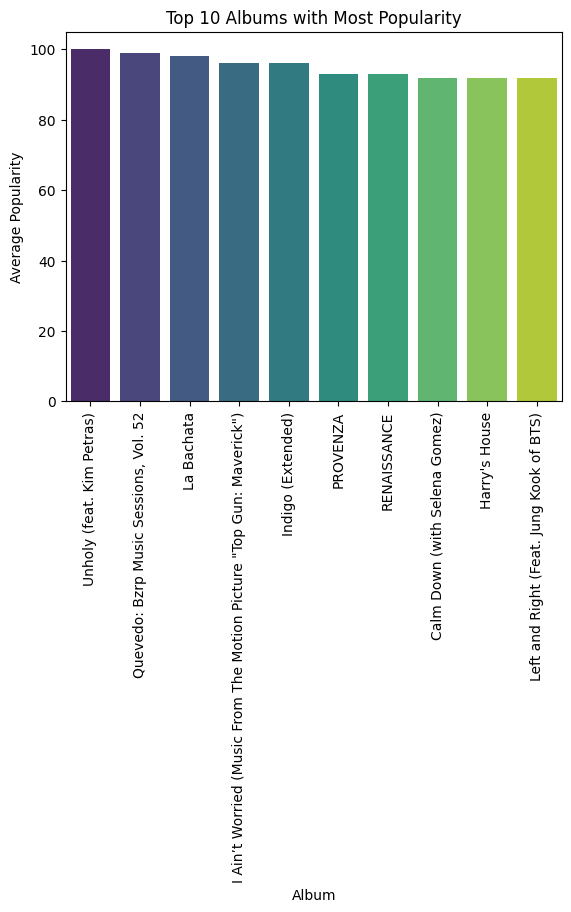

In [12]:
top_albums = df.groupby('album_name')['popularity'].mean().nlargest(10)

sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')
plt.title('Top 10 Albums with Most Popularity')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

- The top 10 most popular albums have a popularity score above 90. The top album is "Unholy," with a popularity score of 100.

Now, let's examine how explicit a musical genre is:

C:\Users\carol\AppData\Local\Temp\ipykernel_7180\167895013.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genres_explicit_df, x='track_genre', y='explicit_percentage', palette='viridis')


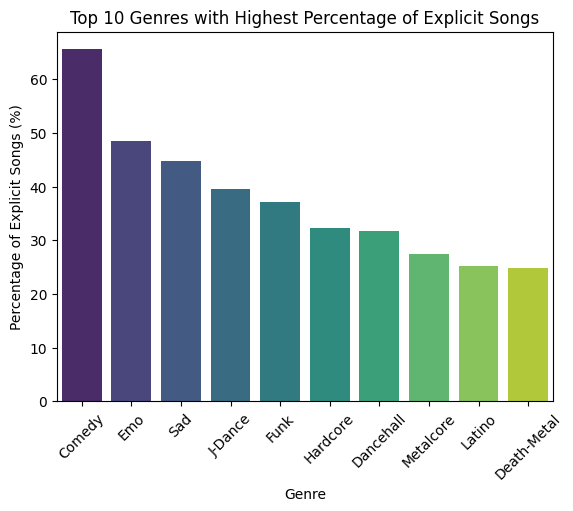

In [30]:
genre_explicit_percentage = df.groupby('track_genre')['explicit'].mean() * 100
top_10_genres_explicit = genre_explicit_percentage.sort_values(ascending=False).head(10)

top_10_genres_explicit_df = top_10_genres_explicit.reset_index()
top_10_genres_explicit_df.columns = ['track_genre', 'explicit_percentage']

sns.barplot(data=top_10_genres_explicit_df, x='track_genre', y='explicit_percentage', palette='viridis')
plt.title('Top 10 Genres with Highest Percentage of Explicit Songs')
plt.xlabel('Genre')
plt.ylabel('Percentage of Explicit Songs (%)')
plt.xticks(rotation=45)
plt.show()

- In the top position, we have comedy with over 60%, followed by emo and sad genres.